<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/LEZ11_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.spatial import distance
import numpy as np
import pylab as pl

In [2]:
distance.minkowski?


In [4]:
np.random.seed(385)
u = np.random.randn(100).reshape(10,10)
v = np.random.rand(100).reshape(10,10)

In [ ]:
distance.minkowski(u[0], v[0], p= 2) # calcola distanze tra vettori

2.5205421502078553

In [ ]:
# distanza tra elementi di matrici
# mi riporta solo gli elementi sotto la diagonale
distance.pdist(u).shape

(45,)

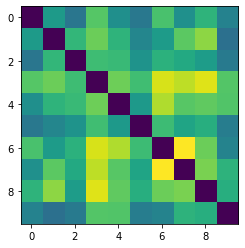

In [5]:
# la matrice delle distanze si ottiene con il comando
import pylab as pl
pl.imshow(distance.squareform(distance.pdist(u)))

In [7]:
# CLUSTERING with K-means
pl.rcParams['font.size'] = 20
import scipy.ndimage as nd
import skimage.io as io
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd /content/drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


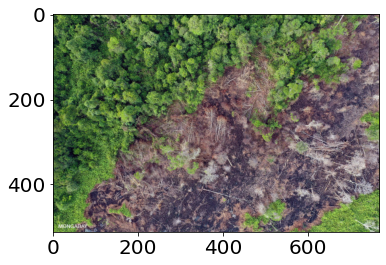

In [9]:
figure = io.imread('kalbar_drone_190113-768x512.jpg')
pl.imshow(figure)

In [10]:
#controlliamo che l'immagine abbai i 3 canali per il colore 
figure.shape
# 512*768 pixels, ogni pixel 3 canali di colore RGB

(512, 768, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn import preprocessing

In [ ]:
figScaled = preprocessing.minmax_scale(figure.reshape(figure.shape[0]*figure.shape[1], 3).astype(float), axis = 1)
# minmaxscale si aspetta un array, le mie osservazioni sono disposte su una matrice, 
# dunque per normalizzare tutto le metto su un array come float
# l'asse che voglio normalizzare diventerà il secondo (1) cioè quello dei colori
figScaled.shape


(393216, 3)

In [ ]:
figScaled.reshape(figure.shape)[100,100]

array([0.        , 1.        , 0.02439024])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


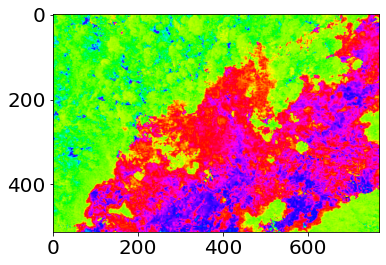

In [ ]:
pl.imshow(figScaled.reshape(figure.shape))

In [ ]:
# clustering
ncluster = 3

In [ ]:
figCluster = KMeans(n_clusters= ncluster, random_state= 719 ).fit(figScaled)

In [ ]:
figCluster.cluster_centers_ # mostra i centri dei cluster

array([[0.6757356 , 0.01878415, 0.93700321],
       [0.39224699, 0.99576146, 0.05049658],
       [0.99904481, 0.11369352, 0.17376135]])

In [ ]:
# se voglio indicare dei possibili centri dei cluster posso suggerirgli un array:
mycenters = np.array([[1,0,0],[0,1,0],[0,0,1]])
figCluster = KMeans(n_clusters= ncluster,
                    init=mycenters, random_state= 719 ).fit(figScaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.


In [ ]:
figCluster.cluster_centers_ # mostra i centri dei cluster

array([[0.99905749, 0.1121834 , 0.17975065],
       [0.39229555, 0.99578344, 0.05037905],
       [0.66972002, 0.01934795, 0.94263072]])

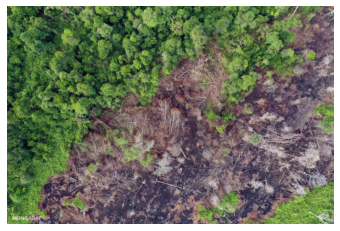

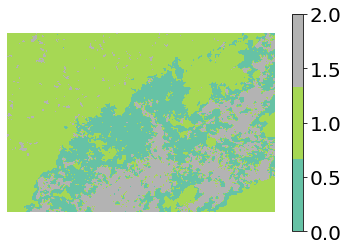

In [ ]:
from matplotlib import cm
pl.imshow(figure)
pl.axis('off');
pl.figure()
mycmap = cm.get_cmap('Set2', ncluster)
pl.imshow(figCluster.labels_.reshape(figure.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

In [ ]:
# calcoliamo la percentuale di verde nella figura
print("fraction of vegetation pixel {:.3f}".format((figCluster.labels_ == 1).sum() * 1.0 / len(figCluster.labels_)))

fraction of vegetation pixel 0.493


## elbow method

cercare numero corretto di cluster

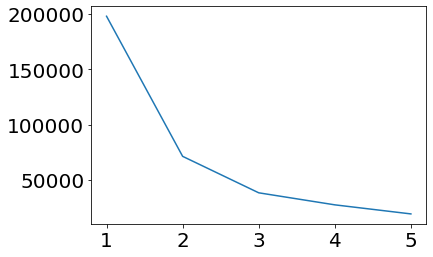

In [ ]:
inertias = []
for i in range(1,6):
  figCluster = KMeans(n_clusters=i, random_state=302).fit(figScaled)
  inertias.append(figCluster.inertia_)

pl.plot(range(1, 6), inertias)

dal grafico sembrerebbe che il numero corretto sia 2 o 3 cluster, ma è un metodo molto approssimativo